### Let's import the required tools first

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### I have downloaded the data set provided in the question to my local machine's memory. Now i'm fetching the dataset from the memory directly.

In [2]:
train = pd.read_csv('/Users/meghrajthebillionaire/Downloads/house-prices-advanced-regression-techniques/test.csv')
test = pd.read_csv('/Users/meghrajthebillionaire/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [3]:
#conacting train and test
df=pd.concat([train,test])
df.shape

(2919, 81)

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Till now, we can see the headlines or the data columns in our combined data set. Now let's write the code to our first task:
## 1. Performing EDA with Univariate analysis:

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

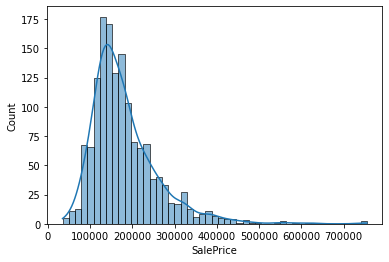

In [5]:
# i'm picking the variable salesPrice to show the univariate analysis here:

sns.histplot(data=df.SalePrice, kde=True)

#### This is the general plot. Let's customise it to observe and understand better

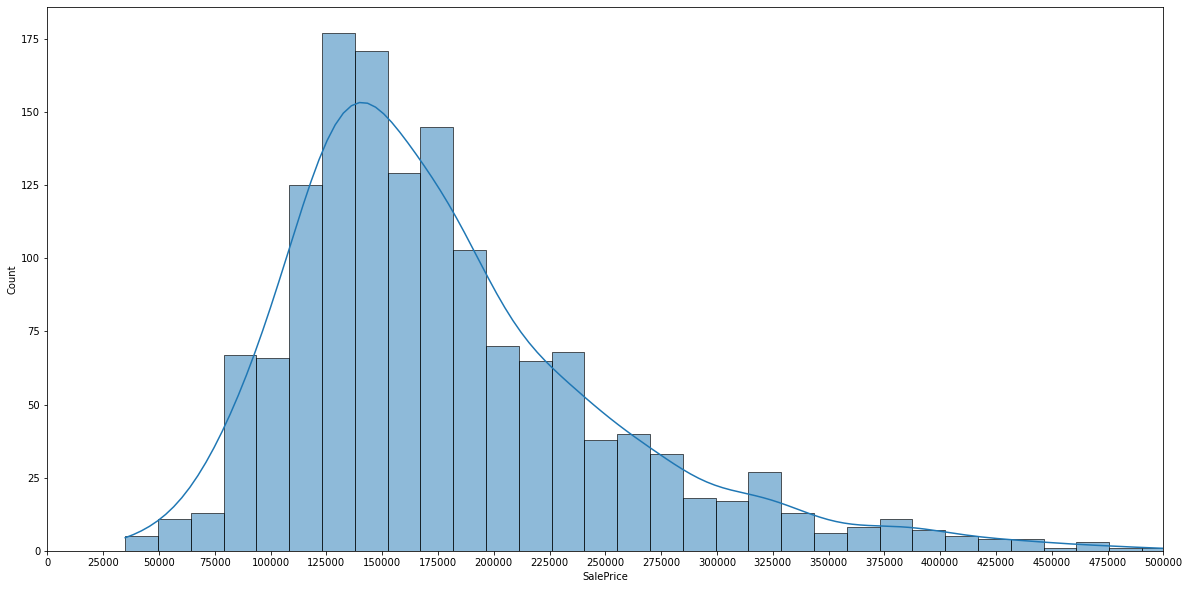

In [6]:
fig, ax = plt.subplots()
sns.histplot(df.SalePrice, ax=ax, kde=True)
fig.set_size_inches(20,10) # scales the figure
ax.set_xlim(1,500000)
ax.set_xticks(np.arange(0, 500000+1, 25000))
plt.show()

### EDA with unvariate is done successfully using the SalePrice of the houses. 
### By analyzing the above plot, we find that in the range of Rs 1,20,000-1,50,000 most houses are available to sell.

In [44]:
data = df[["Id","OverallQual","SalePrice","YrSold","LotArea","PoolArea"]]

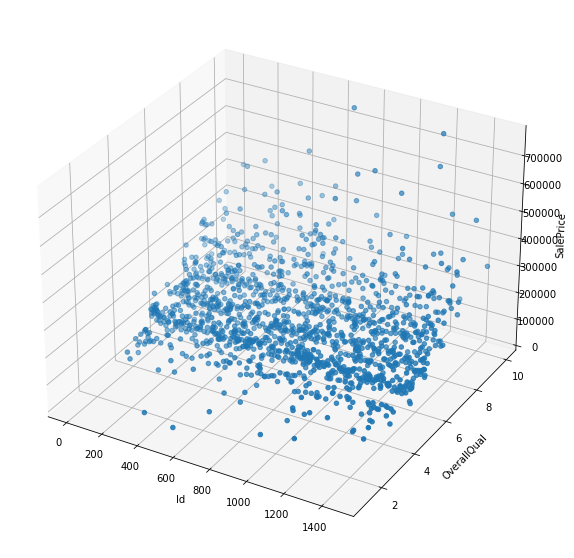

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=100
fig.set_size_inches(20,10) # scales the figure
ax.scatter(data["Id"],data["OverallQual"],data["SalePrice"])
ax.set_xlabel("Id")
ax.set_ylabel("OverallQual")
ax.set_zlabel("SalePrice")
plt.show()

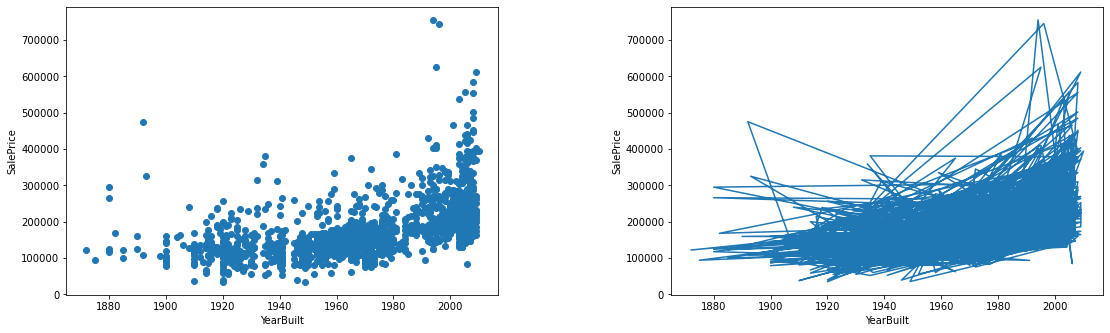

In [7]:
# i'm picking the variable salesPrice as well as Ids the houses in two diff graphs
x_years = df['YearBuilt']
y_prices = df['SalePrice']
plt.axes([2.4,1,1,1])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.plot(x_years,y_prices)
plt.axes([1,1,1,1])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(x_years,y_prices)
plt.show()


### Now let's go for our 2nd task: 
## 2. Performing EDA with Multivariate analysis:

In [36]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [46]:
#submission = pd.DataFrame({'Id':df['Id'].values,'SalePrice':df['SalePrice'],'YearBuilt':df['YearBuilt'],'OverallQual':df['OverallQual'],'LotArea':df['LotArea'],
#   'YrSold':df['YrSold'],'MiscVal':df['MiscVal'],'PoolArea':df['PoolArea']})
# sm = pd.DataFrame[['Id','LotArea','YearBuilt','OverallQual','PoolArea','YrSold','MiscVal','SalePrice']]
# sns.pairplot(pd.DataFrame[(df.Id, df.LotArea, df.YearBuilt, df.OverallQual, df.PoolArea, df.YrSold, df.MiscVal, df.SalePrice)])

box=df[['Id','LotArea','YearBuilt','OverallQual','PoolArea','YrSold','MiscVal','SalePrice']]
sns.scatterplot(box)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

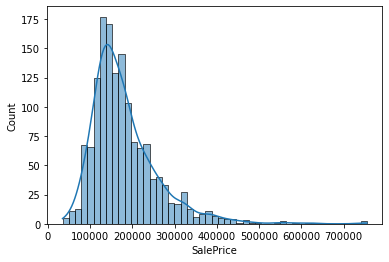

In [ ]:
#impute missing values
from sklearn.impute import SimpleImputer
impute_numreric=SimpleImputer(strategy='mean')
impute_cat=SimpleImputer(strategy='most_frequent')

for column in df.columns:
    if df[column].dtype in numeric_dtype and df[column].isnull().sum()!=0:
        df[column]=impute_numreric.fit_transform(df[[column]])
    elif df[column].dtype not in numeric_dtype and df[column].isnull().sum()!=0:
        df[column]=impute_cat.fit_transform(df[[column]])

In [ ]:
#no missing values in data
df.isnull().sum()

In [ ]:
#encoding data
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
for column in df.columns:
    if df[column].dtype not in numeric_dtype:
        df[column]=lbl.fit_transform(df[column])

In [ ]:
df.info()

In [ ]:
#import Regression algorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import VotingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
lr=LinearRegression()
rd=Ridge(alpha=10)
ls=Lasso(alpha=10)
lr.fit(x_train,y_train)
rd.fit(x_train,y_train)
ls.fit(x_train,y_train)
y_prde_lr=lr.predict(x_test)
y_prde_rd=rd.predict(x_test)
y_prde_ls=ls.predict(x_test)

In [ ]:
print("r2_acore")
print("LinearRegression:",mean_absolute_error(y_prde_lr,y_test))
print("Ridg:",mean_absolute_error(y_prde_rd,y_test))
print("Lasso:",mean_absolute_error(y_prde_ls,y_test))

r2_acore
LinearRegression: 31541.280185934604
Ridg: 31510.970101022474
Lasso: 31525.167014576404


In [ ]:
#79 percent accuracy with Decision Tree
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
r2_score(y_pred_dt,y_test)

0.7953031768533718

In [ ]:
#accurate result
cross_val_score(dt,x_train,y_train,cv=5).mean()

0.6722619158188887

In [ ]:
#applying random forest
rf=RandomForestRegressor(n_estimators=500,n_jobs=-1,min_samples_split=3,max_depth=20)
rf.fit(x_train,y_train)
rf.feature_importances_

array([2.63136887e-01, 1.33373326e-03, 1.29631991e-03, 6.52613396e-03,
       1.81037948e-02, 9.62567862e-06, 1.97645496e-04, 2.33969045e-03,
       1.13870922e-03, 1.70433094e-06, 7.25288008e-04, 4.99303662e-04,
       7.67939593e-03, 5.33362447e-04, 2.05699788e-04, 3.25459517e-04,
       7.10620822e-04, 3.16782933e-01, 4.55723061e-03, 1.02827684e-02,
       6.06375705e-03, 1.07153538e-03, 1.86093363e-04, 2.01518580e-03,
       1.53738684e-03, 1.24990592e-03, 5.48762928e-03, 3.19704109e-03,
       5.93467773e-04, 5.54636958e-04, 3.05972436e-03, 3.41449064e-04,
       1.56483744e-03, 1.72706994e-03, 3.25413712e-02, 2.66644979e-04,
       6.92492018e-04, 6.05584861e-03, 3.28127081e-02, 1.65216176e-04,
       6.46810213e-04, 2.30977026e-03, 1.35795745e-04, 2.21378054e-02,
       1.49660000e-02, 8.67873318e-05, 9.16145905e-02, 7.17969742e-04,
       2.79769303e-04, 3.38379686e-03, 8.69190041e-04, 2.02008936e-03,
       1.10523936e-03, 4.75437600e-03, 1.33676509e-02, 7.30264926e-04,
      

In [ ]:
y_pred=rf.predict(x_test)
r2_score(y_pred,y_test)
y_pred

array([381018.9734746 , 141757.89678571, 180954.22632329, 133986.9397381 ,
       181407.15617041, 180921.19589041, 180921.19589041, 180603.51110685,
       180921.19589041, 180920.6849372 , 133339.10647836, 139746.80024194,
       165476.31671429, 180727.67777352, 134958.09870722, 525887.13414589,
       289315.1144    ,  80959.49332821, 182223.71960273, 180965.59321609,
       267078.53613333, 180921.19589041, 180921.19589041, 180959.55104387,
       141196.12889367, 180858.43230274, 158938.59116667, 119249.15680779,
       180921.19589041, 116980.8718697 , 112918.39006154, 161417.81711096,
       119507.4208    , 185471.11846188, 127459.52680318, 169006.62221188,
       206864.05479008, 193985.75354015, 180889.37221196, 214186.56409524,
       155934.80116681, 125210.08910924, 182396.93530594, 184986.18908562,
       269592.89995238, 180774.15349863, 178667.00858873, 193786.30662118,
       150578.5632381 , 342038.51705238, 180921.19589041, 280883.23477619,
       180921.19589041, 1

In [ ]:
#cross val score
cross_val_score(rf,x_train,y_train,cv=10).mean()

0.8332730211638104

In [ ]:
submission = pd.DataFrame({'Id':x_test['Id'].values,'SalePrice':y_pred})

<AxesSubplot:>

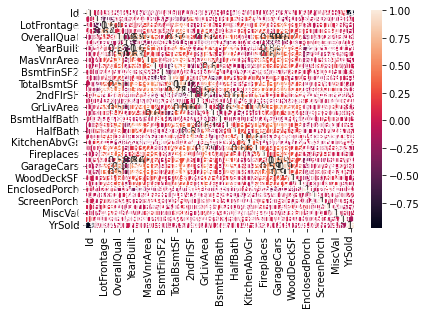

In [ ]:
sns.heatmap(train.corr(), annot = True)

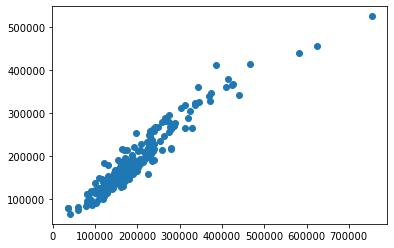

In [ ]:
plt.scatter(y_test, y_pred)

As we can see in this scatter plot that it is in line shape. Hence we can say that my model is predicting good.
Now let's put the prediction again in displot:

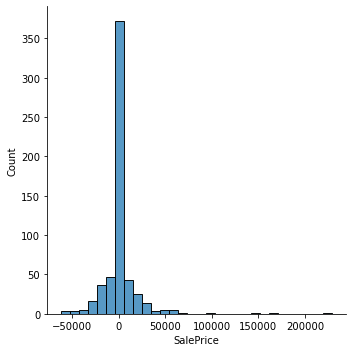

In [ ]:
sns.displot((y_test-y_pred),bins=30)

Observing this well shaped plot, we can again coclude that my model is well predicting.
Hence, 